# #BigSim

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import rspie as rs
from matplotlib import pyplot as plt
import cmasher as cm
import os
from scipy.interpolate import interp1d

## ##A function to create circuit files with metasurfaces

In [15]:
some_radii_and_phases = [(0, 0), (0.1, np.pi/2), (0.2, np.pi), (0.2, 2*np.pi)]
some_radii_and_phases = np.array(some_radii_and_phases)
radii = some_radii_and_phases[:,0]
phases = some_radii_and_phases[:,1]
pillar_func = interp1d(phases, radii, kind='linear')

focal_length = 25.
free_space_wavelength = 0.600
phase_func = rs.fresnel_profile(focal_length, free_space_wavelength)
metal_config = {
    'circuitFname': 'testingtesting.ind',
    'pillar_func': pillar_func,
    'phase_func': phase_func,
    'prefix': 'outro',
    'ApertureRadius' : 20,
    'PillarHeight': 5.0,
    'background_index': 1.,
    'period': 0.75,
    'PillarIndex': 1.5,
    'output_grid_pitch': free_space_wavelength/5.,
    'free_space_wavelength': free_space_wavelength,
    'SubstrateIndex': 1.5}
metal_me = rs.metamaker(metal_config)
metal_me.save_to_file()

## ##A function to create widths and phases

In [28]:
config = {
    'Period': 0.4,
    'free_space_wavelength': 0.45,
    'PillarIndex':    1.5,
    'SubstrateIndex': 1.5,
    'Aspect': 1,
    'Angle':  0,
    'prefix': 'nanosim',
    'Har': 8,
    'fill_steps': 11
}

In [34]:
overlap_phases, pillar_widths = rs.atom_maker(config)

100%|██████████| 11/11 [00:13<00:00,  1.27s/it]


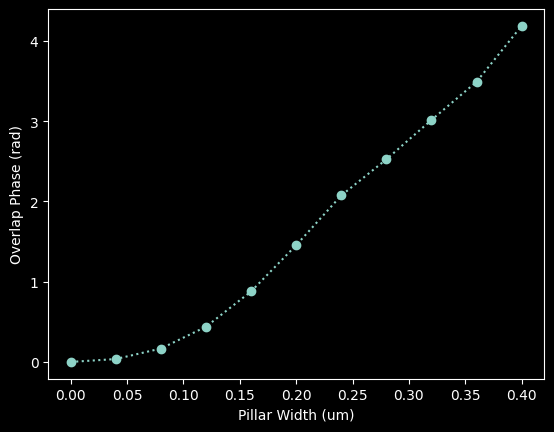

In [35]:
plt.figure()
plt.plot(pillar_widths, overlap_phases, 'o:')
plt.xlabel('Pillar Width (um)')
plt.ylabel('Overlap Phase (rad)')
plt.show()